# Load Libraries

In [1]:
import glob
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all columns
pd.options.display.max_columns = None


# Get Multiple Json Files

In [3]:
# get lists of multiple json files
path = ".\data_gzip" # get files in the folder
json_files = glob.glob(os.path.join(path, "*.json")) #make list of paths

In [4]:
# see first 10 files
json_files[:10]

['.\\data_gzip\\2020-11-01-00-07#1067.json',
 '.\\data_gzip\\2020-11-01-00-17#1152.json',
 '.\\data_gzip\\2020-11-01-00-27#1120.json',
 '.\\data_gzip\\2020-11-01-00-37#1158.json',
 '.\\data_gzip\\2020-11-01-00-47#1174.json',
 '.\\data_gzip\\2020-11-01-00-57#1156.json',
 '.\\data_gzip\\2020-11-01-01-07#1180.json',
 '.\\data_gzip\\2020-11-01-01-17#1118.json',
 '.\\data_gzip\\2020-11-01-01-28#1202.json',
 '.\\data_gzip\\2020-11-01-01-38#1181.json']

# Count and Filter Multiple A20 Runs for Each Json Files

In [5]:
# combine multiple json files into one data frame
prep_data = pd.DataFrame()
data_cnt = 0

a20_cnt = 0
a20_win =0

a0_cnt = 0
a0_win =0

a20_cnt_char = dict()
a20_win_char = dict()

a0_cnt_char = dict()
a0_win_char = dict()


cnt = 0
tot_cnt = len(json_files)


for file in json_files:
    # get counts of all attempts (all runs)
    data = pd.read_json(file)
    data_cnt = data_cnt + data.shape[0]
    cnt = cnt + 1
    
    data = pd.json_normalize(data.event)
    
    # get Ascension 0 runs atempts
    lvl = 0
    data0 = data[data.ascension_level == lvl].reset_index(drop = True)
    a0_cnt = a0_cnt + data0.shape[0]
    for i in data0['character_chosen'].tolist():
        a0_cnt_char[i] = a0_cnt_char.get(i, 0) + 1

    # get victorious on heart runs
    data0 = data0[data0.victory == True]
    data0 = data0[data0.floor_reached >= 55].reset_index(drop = True)
    a0_win = a0_win + data0.shape[0]
    for i in data0['character_chosen'].tolist():
        a0_win_char[i] = a0_win_char.get(i, 0) + 1
    
    
    # get Ascension 20 runs atempts
    lvl = 20
    data = data[data.ascension_level >= lvl].reset_index(drop = True)
    a20_cnt = a20_cnt + data.shape[0]
    for i in data['character_chosen'].tolist():
        a20_cnt_char[i] = a20_cnt_char.get(i, 0) + 1
    
    # get victorious on heart runs
    data = data[data.victory == True]
    data = data[data.floor_reached >= 55].reset_index(drop = True)
    a20_win = a20_win + data.shape[0]
    for i in data['character_chosen'].tolist():
        a20_win_char[i] = a20_win_char.get(i, 0) + 1
    
    prep_data = prep_data.append(data, ignore_index = True)
    print(str(cnt) + "/" + str(tot_cnt), sep = ' ', end = '\r', flush = True) # print dynamically
    

# Preview of Json Files while Running

In [6]:
prep_data.head()

,gold_per_floor,floor_reached,playtime,items_purged,score,play_id,local_time,is_ascension_mode,campfire_choices,neow_cost,seed_source_timestamp,circlet_count,master_deck,relics,potions_floor_usage,damage_taken,seed_played,potions_obtained,is_trial,path_per_floor,character_chosen,items_purchased,campfire_rested,item_purchase_floors,current_hp_per_floor,gold,neow_bonus,is_prod,is_daily,chose_seed,campfire_upgraded,win_rate,timestamp,path_taken,build_version,purchased_purges,victory,max_hp_per_floor,card_choices,player_experience,relics_obtained,event_choices,is_beta,boss_relics,items_purged_floors,is_endless,potions_floor_spawned,killed_by,ascension_level,special_seed
0,"[116, 128, 128, 145, 164, 164, 199, 36, 60, 77...",57,3592,"[Strike_B, Fusion]",3387,f0e5a910-179f-4b2c-8faa-36c4b18dc596,20201101075911,True,"[{'data': 'Doom and Gloom', 'floor': 6.0, 'key...",NONE,0,0.0,"[AscendersBane, Defend_B, Defend_B, Defend_B, ...","[Snecko Eye, Boot, MealTicket, Dream Catcher, ...",[],"[{'damage': 8.0, 'enemies': '2 Louse', 'floor'...",8817479027442936069,"[{'floor': 1.0, 'key': 'SneckoOil'}, {'floor':...",False,"[M, M, ?, M, M, R, E, $, T, M, ?, R, E, M, R, ...",DEFECT,"[Loop, ClockworkSouvenir, Self Repair, Meteor ...",1,"[8, 22, 22, 30, 54, 54]","[56, 55, 55, 55, 50, 50, 25, 25, 25, 11, 11, 3...",112,BOSS_RELIC,False,False,False,6,0.0,1604188751,"[M, M, ?, ?, M, R, E, $, T, M, ?, R, E, M, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Steam Power', 'Tempest', 'Go...",1711065,"[{'floor': 7.0, 'key': 'Boot'}, {'floor': 9.0,...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['Busted Crown', 'Astrolabe'],...","[8, 54]",False,"[1, 5, 7, 16, 18, 20, 29, 35, 42, 48, 55]",NaN,20,0.0
1,"[110, 57, 76, 88, 48, 48, 73, 22, 22, 22, 34, ...",57,2499,"[Strike_B+1, Strike_B+1]",2856,e7965be2-e720-4f70-a41f-1e102caae779,20201031190308,True,"[{'data': 'Sweeping Beam', 'floor': 6.0, 'key'...",NONE,0,0.0,"[AscendersBane, Strike_B+1, Defend_B+1, Defend...","[Calling Bell, Bag of Preparation, Cables, Win...","[56, 56, 56, 56, 56, 56, 56, 56]","[{'damage': 4.0, 'enemies': 'Jaw Worm', 'floor...",-7915356058747897097,"[{'floor': 1.0, 'key': 'DuplicationPotion'}, {...",False,"[M, ?, M, M, M, R, E, $, T, ?, M, E, E, M, R, ...",DEFECT,"[Coolheaded, OrangePellets, PreservedInsect, R...",4,"[8, 37, 37, 48, 48, 48, 48, 48, 48, 48, 54]","[60, 60, 60, 57, 35, 35, 23, 23, 23, 71, 69, 5...",57,BOSS_RELIC,False,False,False,4,0.0,1604188988,"[M, ?, M, M, ?, R, E, ?, T, ?, ?, E, E, ?, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 73, 7...","[{'not_picked': ['Leap', 'Redo'], 'picked': 'S...",583140,"[{'floor': 0.0, 'key': 'Bag of Preparation'}, ...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",True,"[{'not_picked': ['Sozu', 'SlaversCollar'], 'pi...","[37, 48]",False,"[1, 3, 11, 18, 21, 24, 27, 33, 35, 36, 44]",NaN,20,0.0
2,"[119, 129, 129, 149, 161, 161, 190, 210, 262, ...",57,6662,"[Strike_B, Strike_B+1]",2702,bc717009-43e1-4177-98b9-dd41fe283145,20201031190326,True,"[{'data': 'Darkness', 'floor': 6.0, 'key': 'SM...",NONE,0,0.0,"[AscendersBane, Defend_B+1, Defend_B+1, Defend...","[Nuclear Battery, Gremlin Horn, Dream Catcher,...","[56, 56]","[{'damage': 5.0, 'enemies': '2 Louse', 'floor'...",4177121344993452559,"[{'floor': 1.0, 'key': 'LiquidBronze'}, {'floo...",False,"[M, M, ?, M, M, R, E, M, T, M, M, E, ?, E, R, ...",DEFECT,"[Membership Card, Happy Flower, The Bomb, Apot...",0,"[20, 20, 20, 28, 28, 28, 37, 54]","[59, 57, 57, 60, 37, 37, 39, 45, 45, 51, 58, 6...",39,BOSS_RELIC,False,False,False,8,0.0,1604189006,"[M, M, ?, M, M, R, E, M, T, M, ?, E, ?, E, R, ...",2020-07-30,2,True,"[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 7...","[{'not_picked': ['Go for the Eyes', 'Sweeping ...",201155,"[{'floor': 7.0, 'key': 'Gremlin Horn'}, {'floo...","[{'damage_healed': 0.0, 'max_hp_gain': 0.0, 'm...",False,"[{'not_picked': ['SacredBark', 'Runic Dome'], ...","[20, 37]",False

In [7]:
prep_data.columns

Index(['gold_per_floor', 'floor_reached', 'playtime', 'items_purged', 'score',
       'play_id', 'local_time', 'is_ascension_mode', 'campfire_choices',
       'neow_cost', 'seed_source_timestamp', 'circlet_count', 'master_deck',
       'relics', 'potions_floor_usage', 'damage_taken', 'seed_played',
       'potions_obtained', 'is_trial', 'path_per_floor', 'character_chosen',
       'items_purchased', 'campfire_rested', 'item_purchase_floors',
       'current_hp_per_floor', 'gold', 'neow_bonus', 'is_prod', 'is_daily',
       'chose_seed', 'campfire_upgraded', 'win_rate', 'timestamp',
       'path_taken', 'build_version', 'purchased_purges', 'victory',
       'max_hp_per_floor', 'card_choices', 'player_experience',
       'relics_obtained', 'event_choices', 'is_beta', 'boss_relics',
       'items_purged_floors', 'is_endless', 'potions_floor_spawned',
       'killed_by', 'ascension_level', 'special_seed'],
      dtype='object')

# See Results

In [8]:
print(prep_data.shape[0]) # winning a20 runs
print("total runs: {}".format(data_cnt))
print("total A20 runs: {}".format(a20_cnt))
print("total A20 runs: {}".format(a20_win))

7155
total runs: 2075105
total A20 runs: 238579
total A20 runs: 7155


In [9]:
print("total A0 runs: {}".format(a0_cnt))
print("total A0 runs: {}".format(a0_win))

total A0 runs: 644106
total A0 runs: 9084


**Non-Ascension Winning Percentage**
- 1.41%

In [10]:
(a0_win/a0_cnt)*100

1.4103268716639807

**Ascension 20 Winning Percentage**
- 3.00% 

In [11]:
(a20_win/a20_cnt)*100

2.9990066183528308

**3.00% Ascension 20 runs are Victorious (November 2020)** 

learn from elite players

In [12]:
a20_cnt_char

{'THE_SILENT': 67159, 'DEFECT': 60445, 'IRONCLAD': 85279, 'WATCHER': 25696}

In [13]:
a20_win_char

{'DEFECT': 1204, 'THE_SILENT': 1591, 'IRONCLAD': 2648, 'WATCHER': 1712}

**Save Winning Runst to json and csv file**

In [14]:
prep_data.to_json("A20runs.json")

In [15]:
prep_data.to_csv("A20runs.csv", index = False)

# Plot

## Plot Number of Winning Runs

In [16]:
char_cnt = prep_data.groupby('character_chosen').size()
char_cnt

character_chosen
DEFECT        1204
IRONCLAD      2648
THE_SILENT    1591
WATCHER       1712
dtype: int64

In [17]:
char_cnt =char_cnt.reindex(["IRONCLAD", "THE_SILENT", "DEFECT", "WATCHER"])

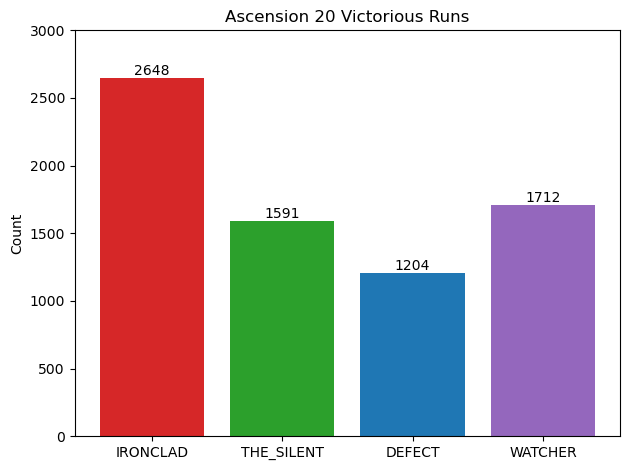

In [18]:
my_colors = ['tab:red','tab:green','tab:blue','tab:purple']  #red, green, blue, black, etc.

plt.style.use('default')

fig, ax = plt.subplots()
ax.bar(char_cnt.index, char_cnt, color = my_colors)
for i in range(len(char_cnt)):
    ax.annotate(str(char_cnt[i]), xy=(char_cnt.index[i], char_cnt[i]), ha='center', va='bottom')
ax.set_ylim([0,3000])
ax.set_ylabel("Count")
ax.set_title("Ascension 20 Victorious Runs")

plt.tight_layout()

plt.show()

In [19]:
fig.savefig("img/A20runs.png")

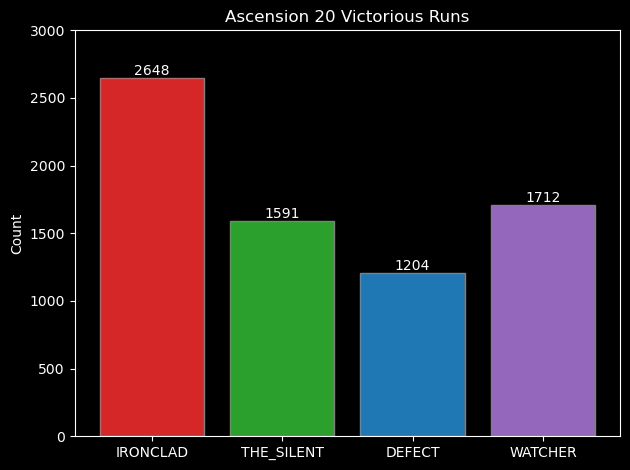

In [20]:
my_colors = ['tab:red','tab:green','tab:blue','tab:purple']  #red, green, blue, black, etc.

plt.style.use('dark_background')

fig, ax = plt.subplots()
ax.bar(char_cnt.index, char_cnt, color = my_colors, edgecolor = 'grey')
for i in range(len(char_cnt)):
    ax.annotate(str(char_cnt[i]), xy=(char_cnt.index[i], char_cnt[i]), ha='center', va='bottom')
ax.set_ylim([0,3000])
ax.set_ylabel("Count")
ax.set_title("Ascension 20 Victorious Runs")

plt.tight_layout()

plt.show()

In [21]:
fig.savefig("img/A20runs_dark.png")

## Plot Ascension 20 Winning Percentage

In [22]:
a20_cnt_char

{'THE_SILENT': 67159, 'DEFECT': 60445, 'IRONCLAD': 85279, 'WATCHER': 25696}

In [23]:
a20_win_char

{'DEFECT': 1204, 'THE_SILENT': 1591, 'IRONCLAD': 2648, 'WATCHER': 1712}

In [24]:
a20_cnt_char_pd = pd.Series(a20_cnt_char)
a20_win_char_pd = pd.Series(a20_win_char)

In [25]:
#a20_runs_win = pd.concat([a20_cnt_char_pd, a20_win_char_pd], axis=1)
a20_runs_win_rate = (a20_win_char_pd/a20_cnt_char_pd)*100 

In [26]:
a20_runs_win_rate = a20_runs_win_rate.reindex(["IRONCLAD", "THE_SILENT", "DEFECT", "WATCHER"])

In [27]:
a20_runs_win_rate = a20_runs_win_rate.round(2)

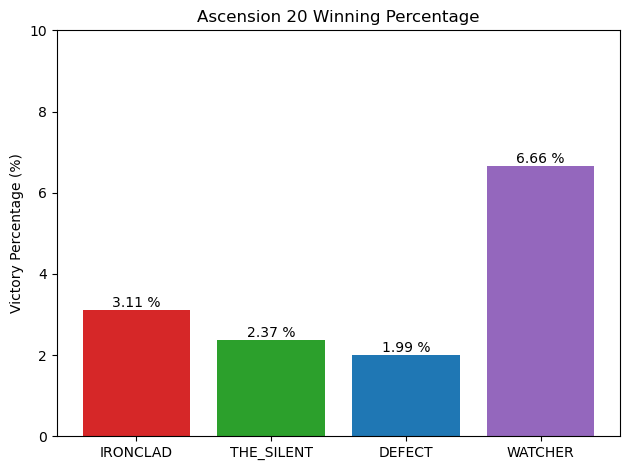

In [28]:
my_colors = ['tab:red','tab:green','tab:blue','tab:purple']  #red, green, blue, black, etc.

plt.style.use('default')

fig, ax = plt.subplots()
ax.bar(a20_runs_win_rate.index, a20_runs_win_rate, color = my_colors)
for i in range(len(a20_runs_win_rate)):
    ax.annotate(str(a20_runs_win_rate[i] ) + ' %', xy=(a20_runs_win_rate.index[i], a20_runs_win_rate[i]), ha='center', va='bottom')
ax.set_ylim([0,10])
ax.set_ylabel("Victory Percentage (%)")
ax.set_title("Ascension 20 Winning Percentage")

plt.tight_layout()

plt.show()

In [29]:
fig.savefig("img/A20win_rate.png")

## Non- Ascension Run Winning Percentage

In [30]:
a0_cnt_char_pd = pd.Series(a0_cnt_char)
a0_win_char_pd = pd.Series(a0_win_char)
a0_runs_win_rate = (a0_win_char_pd/a0_cnt_char_pd)*100 

In [31]:
a0_runs_win_rate = a0_runs_win_rate.reindex(["IRONCLAD", "THE_SILENT", "DEFECT", "WATCHER"])

In [32]:
a0_runs_win_rate = a0_runs_win_rate.round(2)

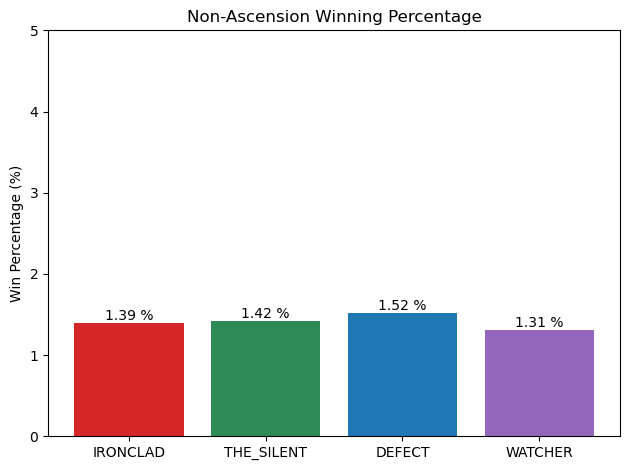

In [33]:
my_colors = ['tab:red','seagreen','tab:blue','tab:purple']  #red, green, blue, black, etc.

plt.style.use('default')

fig, ax = plt.subplots()
ax.bar(a0_runs_win_rate.index, a0_runs_win_rate, color = my_colors)
for i in range(len(a0_runs_win_rate)):
    ax.annotate(str(a0_runs_win_rate[i] ) + ' %', xy=(a0_runs_win_rate.index[i], a0_runs_win_rate[i]), ha='center', va='bottom')
ax.set_ylim([0,5])
ax.set_ylabel("Win Percentage (%)")
ax.set_title("Non-Ascension Winning Percentage")

plt.tight_layout()

plt.show()

In [34]:
fig.savefig("img/A0win_rate.png")